# Censoring 

### Exact failure time is not observed but know only to be greater than a certain level

### Types : 

#### Right:
 Event of interset is not observed beyond certain point in time.
 eg.End of the study 
 
#### left:
 Event haas occured before study begin.

#### interval:
 Failure time is known to lie within a specific interval.

# 

# Right Censoring

### eg.  clinical trial studying the time until relapse for patients with a certain medical condition. The study has a fixed duration, and not all patients experience a relapse during this period. Some patients might still be in remission at the end of the study, and their relapse times are right-censored.

#### Patients who experienced a relapse have an event value of 1, while patients who did not experience a relapse (right-censored) have an event value of 0.

In [10]:
import pandas as pd
from lifelines import KaplanMeierFitter   #non parametric estimate
import matplotlib.pyplot as plt


The Kaplan-Meier estimator is then applied to estimate the survival curve, and the resulting plot includes markers for censored data points.

In [8]:
# Creating a sample dataset
data = pd.DataFrame({
    'time_to_relapse': [10, 15, 20, 30, 40, 50, 60, 70],
    'event': [1, 1, 1, 1, 0, 1, 0, 0]  # 1 indicates relapse, 0 indicates censoring
})

In [3]:
# Fitting Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(durations=data['time_to_relapse'], event_observed=data['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 8 total observations, 3 right-censored observations>

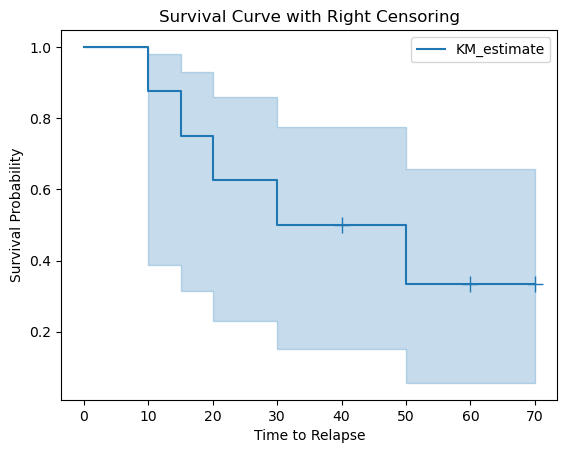

In [9]:
# Plotting the Kaplan-Meier survival curve
kmf.plot_survival_function(show_censors=True)
plt.title('Survival Curve with Right Censoring')
plt.xlabel('Time to Relapse')
plt.ylabel('Survival Probability')
plt.show()

### Interpretation:

The survival curve visually depicts the probability of patients avoiding relapse over time.

Steps downward in the curve correspond to observed relapse events.

The markers indicate points where some patients were right-censored because they did not experience a relapse within the study duration.

In [40]:
###########################################################################################################################

## Log Rank test
### The log-rank test is a widely used statistical test in survival analysis to compare the survival curves of two or more groups. It is particularly useful when dealing with right-censored data.

The test assesses whether there are significant differences in survival experiences between groups.

#### Clinical Trial on Cancer Treatments

Suppose a clinical trial is conducted to compare the survival outcomes of patients with a certain type of cancer. Patients are randomly assigned to receive either Treatment A or Treatment B. The study follows patients for a specified period, noting the time until an event (e.g., death) or censoring if the event hasn't occurred by the end of the study.

In [11]:
from lifelines.statistics import logrank_test

#### The logrank_test function from the lifelines.statistics module, results provide a test statistic, p-value, and other relevant information. 

A low p-value suggests a significant difference in survival between the groups.

In [13]:
# Generate a hypothetical dataset
# These are “what if” data bases which result from a real data base by makiig some alternate assumption about reality. 
# Such data bases are composed of hypothetical relations and are useful for debugging purposes,
# test data and a variety of simulations.

data = pd.DataFrame({
    'time': [12, 24, 36, 48, 60, 72, 84, 96, 108],
    'treatment': ['A', 'A', 'A', 'B', 'A', 'B', 'A', 'B', 'A'],
    'event': [1, 1, 0, 1, 1, 0, 1, 1, 0]  # 1 indicates event, 0 indicates censoring
})



In [14]:
# Separate the data into two treatment groups
group_A = data[data['treatment'] == 'A']
group_B = data[data['treatment'] == 'B']

In [15]:
group_A

,time,treatment,event
0,12,A,1
1,24,A,1
2,36,A,0
4,60,A,1
6,84,A,1
8,108,A,0


In [16]:
group_B

,time,treatment,event
3,48,B,1
5,72,B,0
7,96,B,1


In [17]:
# Fit Kaplan-Meier estimator for each group
kmf_A = KaplanMeierFitter()
kmf_A.fit(durations=group_A['time'], event_observed=group_A['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 6 total observations, 2 right-censored observations>

In [19]:

kmf_B = KaplanMeierFitter()
kmf_B.fit(durations=group_B['time'], event_observed=group_B['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3 total observations, 1 right-censored observations>

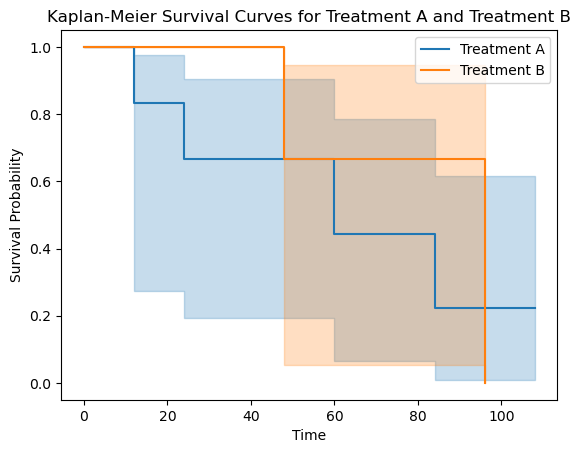

In [30]:
# Plot Kaplan-Meier survival curves for both groups
kmf_A.plot_survival_function(label='Treatment A')
kmf_B.plot_survival_function(label='Treatment B')
plt.title('Kaplan-Meier Survival Curves for Treatment A and Treatment B')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

In [26]:
# Perform the log-rank test
results = logrank_test(
                       durations_A=group_A['time'],
                       durations_B=group_B['time'],
                       event_observed_A=group_A['event'],
                       event_observed_B=group_B['event']
)

In [33]:
print(results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.14 0.71      0.49


### Interpretation

#### Since the p-value is relatively high (0.71), we do not have enough evidence to reject the null hypothesis. The null hypothesis in this context typically states that there is no difference in survival experiences between the two groups.

#### The test statistic of 0.14 suggests a small difference in survival between the groups, but it is not statistically significant given the high p-value.

#### The -log2(p) value of 0.49 is another way to express the p-value. In general, the larger the -log2(p), the smaller the p-value. Here, the -log2(p) is not very large, indicating a non-significant result.

 ## Cox propotional hazard model  -  semi-parametric model

It is commonly used for right-censored data, where the exact event time is not observed but is known to have occurred after a certain time. 

In [34]:
# The Cox PH model assumes that the hazard function is proportional across different levels of covariates. 

#### Let's consider a real-world example involving right interval-censored data and the application of the Cox Proportional-Hazards (Cox PH) model.
In this example, we'll focus on a medical study where patients are monitored for the time it takes for a specific health event (e.g., disease progression) to occur within given time intervals.

Suppose we have a dataset with information about patients, their disease progression intervals, and whether the event of interest (e.g., disease progression) occurred within those intervals. 

In [38]:
data = pd.DataFrame({
    'patient_id': [1, 2, 3, 4, 5],
    'start_interval': [0, 10, 20, 30, 40],
    'end_interval': [10, 20, 30, 40, 50],
    'event_occurred': [1, 1, 0, 1, 0]  # 1 indicates event occurred, 0 indicates right-censoring
})

In [ ]:
# Fit Cox PH model
cph = CoxPHFitter()
cph.fit(data, duration_col='end_interval', event_col='event_occurred')

# Display the summary of the fitted model
print(cph.summary)

## Parametric model
#### Mazimum likelihood estimation
Weibull / Expomnential distribution

### Interval censoring
 right 
 left : 
   Cox Proportional Hazards Model with Left Censoring:
   
   Kaplan-Meier Estimator with Left Censoring:
   
   Nelson-Aalen Estimator with Left Censoring:
   
   Maximum Likelihood Estimation (MLE) with Left Censoring:
   
   Inversion of Rank Tests:
   
   Parametric Bayesian Methods : 
       . Markov Chain Monte Carlo (MCMC)
   
   Turnbull

  non parametric
    Kaplan-Meier Estimator: T
    Nelson-Aalen Estimator
    
 
 parametric
    Weibull, exponential, or log-logistic models, 

 semi-parametric
     Cox Proportional Hazards Model: 
 Bayesian survival analysis
 multiple imputations
 expected mazimization

In [43]:
# There are many ways every time it morely dependent, an ite problem specific.
# Cheak out this post : 

lifelines link : https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix